# Job Planet 채용공고 Scraping Base Code
---

#### Import Library

In [183]:
import time
from datetime import datetime
import bisect
import requests
import json
import re
import os

from selenium import webdriver
from selenium.webdriver.chrome.service import Service

from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By

from selenium.common.exceptions import TimeoutException
from webdriver_manager.chrome import ChromeDriverManager

from bs4 import BeautifulSoup

---
### Base Code
---

In [190]:

####################################
############# 공통 정보 #############
####################################
# Define headers
headers = {
    'accept': 'application/json',
    'accept-language': 'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36',
    'jp-os-type': 'web',
    # jps-ssr-auth : 필수
    'jp-ssr-auth': 'jobplanet_desktop_ssr_1d6f8a5f219176accbb8fe051729fc6a',
}

job_mapping = {
    "데이터 분석가": "Data Analyst",
    "백엔드 개발": "Back-end Developer",
    "서버/백엔드 개발": "Back-end Developer",
    "프론트엔드 개발": "Front-end Developer",
    "웹퍼블리셔": "Front-end Developer",
    "웹개발": "Full-stack Developer",
    "웹 개발": "Full-stack Developer",
    "클라우드 개발": "Full-stack Developer",
    "소프트웨어 개발": "Software Developer",
    "소프트웨어아키텍트": "Software Developer",
    "네트워크/보안/운영": "System Engineer",
    "DBA(Database Admin.)": "Database Administrator (DBA)",
    "iOS 개발": "Mobile Developer",
    "안드로이드 개발": "Mobile Developer",
    "데이터 사이언티스트": "AI/ML Engineer",
    "머신러닝 엔지니어": "AI/ML Engineer",
    "데이터 엔지니어": "Data Engineer",
    "빅데이터 엔지니어": "Data Engineer",
    "QA(Quality Assurance)": "QA Engineer",
    "기술지원": "Technical Support",
    "게임개발": "Game Developer",
    "VR 엔지니어": "Game Developer",
    "CTO(Chief Technology Officer)": "CTO (Chief Technology Officer)",
    "ERP": "ERP Specialist",
    "BI 엔지니어": "BI Engineer",
    "하드웨어 개발": "Hardware Developer"
}

skill_mapping = {
    "Cloud-AWS": ["AWS", "aws"],
    "Cloud-AWS S3": ["AWS S3"],
    "Cloud-AWS Lambda": ["AWS Lambda"],
    "Cloud-AWS Glue": ["AWS Glue"],
    "Cloud-AWS EC2": ["Amazon EC2", "AWS EC2"],
    "Cloud-AWS Elastic Load Balancing": ["AWS Elastic Load Balancing", "AWS Elastic Load Balancing ..."],
    "Cloud-AWS CodeCommit": ["AWS CodeCommit"],
    "Cloud-AWS Data Pipeline": ["AWS Data Pipeline"],
    "Cloud-AWS IAM": ["AWS IAM"],
    "Cloud-AWS IoT": ["AWS IoT Device Management"],
    "Cloud-AWS Storage Gateway": ["AWS Storage Gateway"],
    "Cloud-AWS X-Ray": ["AWS X-Ray"],
    "Cloud-GCP": ["GCP", "Google Cloud Platform", "google cloud", "gcp"],
    "Cloud-GCP BigQuery": ["Google BigQuery"],
    "Cloud-GCP Cloud IoT": ["Google Cloud IoT Core"],
    "Cloud-GCP Load Balancing": ["Google Cloud Load Balancing"],
    "Cloud-GCP Natural Language": ["Google Cloud Natural Language"],
    "Cloud-GCP SQL": ["Google Cloud SQL", "Google Cloud SQL for Postgr..."],
    "Cloud-GCP VPC": ["Google Cloud VPC"],
    "Cloud-Azure": ["Azure", "Microsoft Azure", "azure"],
    "Cloud-Azure App Service": ["Azure App Service"],
    "Cloud-Azure IoT": ["Azure IoT Hub"],
    "Cloud-Azure DevOps": ["Azure DevOps", "Azure DevOps Server"],
    "Cloud-Azure Storage": ["Azure Storage"],
    "Cloud-Azure Synapse": ["Azure Synapse"],
    "Cloud-Azure CDN": ["Azure CDN"],
    "Cloud-Azure Application Insights": ["Azure Application Insights"],
    "Languages-Python": ["Python", "python3", "파이썬", "python"],
    "Languages-Java": ["Java", "java", "Java 8", "java ee"],
    "Languages-C": [ "C", "c", "C언어"],
    "Languages-C#": ["C#", "c#", ".NET", ".NET Core", ".net"],
    "Languages-C++": ["c/c++", "visual c++", "C++", "c++", "C++ Builder"],
    "Languages-Go": ["Golang", "Go","GO", "golang", "go"],
    "Languages-TypeScript": ["TypeScript", "typescript"],
    "Languages-PHP": ["PHP", "php"],
    "Languages-Kotlin": ["Kotlin", "kotlin", "KOTLIN", "코틀린"],
    "Languages-R": ["R", "r", "R Language"],
    "Languages-Ruby": ["Ruby", "ruby on rails", "ruby", "RUBY"],
    "Languages-Swift": ["Swift", "swiftui", "swift"],
    "Languages-Javascript": ["Javascript", "javascript", "JS", "js"],
    "Languages-SQL": ["SQL", "sql"],
    "Languages-Dart": ["Dart"],
    "Web Frameworks-Django": ["django", "Django", "Django REST framework", "Django framework"],
    "Web Frameworks-Flask": ["Flask", "flask"],
    "Web Frameworks-Spring": ["Spring framework", "spring boot", "Web Frameworks-Spring", "Spring", "Spring Boot", "Spring framework", "Spring Framework", "Spring Data JPA"],
    "Web Frameworks-React": ["Web Frameworks-React", "react", "React", "React.js", "React Native", "React Native Seed", "React Navigation", "React Query", "React Redux", "React Router", "React Server", "React.js Boilerplate", "ReactPHP"],
    "Web Frameworks-ExpressJS": ["ExpressJS", "Express"],
    "Web Frameworks-Vue.js": ["vue", "Vue.js", "VueJs", "Vue3", "Vuex"],
    "Web Frameworks-Next.js": ["Next.js", "next js", "NextJS", "next.js"],
    "Web Frameworks-Nest.js": ["nest js", "nest.js", "Nest js", "NestJS" ,"nestjs"],
    "Web Frameworks-Node.js": ["node.js", "node js", "Node.js", "NodeJS", "nodejs"],
    "Web Frameworks-AngularJS": ["AngularJS", "Angular 2", "Angular"],
    "Web Frameworks-ASP.NET": ["ASP.NET", "ASP.NET Core", "ASP.NET MVC", ".net"],
    "DevOps-Docker": ["Docker", "Docker Compose", "Dockerized", "Dockerrizing", "도커", "docker"],
    "DevOps-Kubernetes": ["Kubernetes", "K8S", "k8s", "쿠버네티스"],
    "DevOps-Jenkins": ["Jenkins"],
    "DevOps-Terraform": ["Terraform"],
    "DevOps-Ansible": ["Ansible"],
    "DevOps-CircleCI": ["CircleCI"],
    "DevOps-AWS CodePipeline": ["AWS CodePipeline"],
    "Data Science-TensorFlow": ["TensorFlow", "Tensorflow", "tensorflow", "텐서플로우"],
    "Data Science-PyTorch": ["PyTorch", "pytorch", "PYTORCH", "Pytorch"],
    "Data Science-Pandas": ["Pandas", "pandas"],
    "Data Science-NumPy": ["NumPy", "numpy"],
    "Data Science-Scikit-learn": ["scikit-learn"],
    "Data Science-Keras": ["Keras"],
    "Database-MariaDB": ["MariaDB", "MARIADB", "mariadb", "mariaDB", "Mariadb", "maria", "maria db"],
    "Database-MySQL": ["MySQL", "mysql", "MySQL WorkBench", "MYSQL"],
    "Database-PostgreSQL": ["postgres", "PostgreSQL", "postgresql", "PostGIS"],
    "Database-MongoDB": ["MongoDB", "Mongoose"],
    "Database-Redis": ["Redis", "redis"],
    "Database-Cassandra": ["Cassandra"],
    "Database-MSSQL": ["MSSQL", "Microsoft SQL Server", "sql server"],
    "Database-Oracle": ["Oracle", "Oracle PL/SQL", "Oracle DB", "Oracle Integration Cloud", "오라클"],
    "Database-SQLite": ["SQLite", "SQLAlchemy"],
    "Database-Elasticsearch": ["Elasticsearch"],
    "Mobile Development-Android": ["Android SDK", "Android OS", "android studio"],
    "Mobile Development-iOS": ["iOS", "ios", "iOS 개발"],
    "Mobile Development-Flutter": ["Flutter"],
    "Mobile Development-React Native": ["React Native"],
    "Networking-Firewall": ["Firewall"],
    "Networking-VPN": ["VPN"],
    "Networking-Cisco": ["Cisco", "Cisco ISE"],
    "Networking-TCP/IP": ["TCP/IP", "tcpip"],
    "Tools-Figma": ["Figma"],
    "Tools-Photoshop": ["Adobe Photoshop"],
    "Tools-Jira": ["Jira", "JIRA", "jira", "지라"],
    "Tools-Confluence": ["Confluence"],
    "Tools-Slack": ["Slack", "SLACK", "slack", "슬랙"],
    "Tools-Sketch": ["Sketch"],
    "Tools-Trello": ["Trello", "TRELLO", "트렐로"],
    "Tools-Notion": ["Notion", "노션", "notion"],
    "Frontend-HTML": ["HTML5", "HTML", "html5"],
    "Frontend-CSS": ["CSS3", "CSS 3", "css", "CSS"],
    "Frontend-JavaScript": ["JavaScript", "javascript"],
    "Frontend-Sass": ["Sass"],
    "Frontend-Bootstrap": ["Bootstrap"],
    "AI-Deep Learning": ["Deep Learning", "딥러닝"],
    "AI-Machine Learning": ["machine learning", "Machine Learning", "머신러닝", "AI", "AI/인공지능"],
    "AI-NLP": ["NLP", "자연어처리", "LLM"],
    "Blockchain-Solidity": ["Solidity"],
    "Blockchain-Hyperledger": ["Hyperledger Fabric", "Hyperledger Indy"],
    "Blockchain-Ethereum": ["Ethereum", "etherscan"],
    "Version Control-Git": ["git", "Git", "github", "GitHub", "GitHub Actions", "GitLab", "Bitbucket", "Git Flow"],
    "Other-REST API": ["REST API", "RESTful", "rest api", "restful api"],
    "Other-Socket": ["Socket.IO", "SocketCluster"],
    "Other-GraphQL": ["GraphQL"],
    "Other-Prometheus": ["Prometheus"],
    "Other-Kafka": ["Kafka", "kafka"],
    "Other-Airflow": ["Airflow", "Apache Airflow", "airflow", "apache airflow"],
    "Other-Spark": ["spark", "Apache Spark", "Spark", "SPARK"],
    "Other-Redis": ["REDIS", "Redis", "redis cloud"],
    "Other-OpenAPI": ["OpenAPI"],
    "Other-Swift": ["Swift", "SwiftUI", "RxSwift"],
    "Other-Linux": ["Linux", "Ubuntu", "CentOS", "LINUX", "리눅스", "linux-kernel", "linux kernel"],
    "Other-Windows": ["윈도우", "Windows Server", "Windows","windows", "window"]
}

In [179]:

################################################################################
# 대분류 직군 #
# 11600(개발 전체)
# 11912(데이터 전체)
occupation_level1 = 11912

# 소분류 직군 #
# 11913(데이터 엔지니어)
occupation_level2 = ''
######################
###### 추가 사항 ######
######################
# occupation_level1이 선택되면 -> occupation_levle2는 선택하지 않아도 됨
# ,로 여러개 선택가능
################################################################################
def param(occupation_level1, occupation_level2 , page):
    # Define the parameters
    params = {
        'occupation_level1': occupation_level1,
        'occupation_level2': occupation_level2,
        'years_of_experience': '',
        'review_score': '',
        'job_type': '',
        'city': '',
        'education_level_id': '',
        'order_by': 'aggressive',
        'page': page,
        'page_size': 10
    }

    return params
################################################################
# 특정 id를 기준으로 recruitment_text 값을 추출하는 이진 검색 함수 #
################################################################

def extract_recruitment_text(data_list, id):
    # data_list를 id 값으로 정렬
    data_list.sort(key=lambda x: x['id'])
    
    # 이진 검색을 위한 id 리스트 생성
    id_list = [item['id'] for item in data_list]
    
    # 이진 검색으로 id 값 찾기
    index = bisect.bisect_left(id_list, id)
    
    # id 값이 존재하는지 확인
    if index < len(id_list) and id_list[index] == id:
        return data_list[index].get('recruitment_text')
    return None

# 경력 범위를 추출하는 함수
def minmaxcarrer(recruitment_text):
    if recruitment_text:
        text = recruitment_text[0]
        if "경력무관" in text:
            min_career = 0
            max_career = 0
        else:
            match = re.search(r'(\d+)\s*~\s*(\d+)', text)
            if match:
                min_career = int(match.group(1))
                max_career = int(match.group(2))
            else:
                min_career = None
                max_career = None
    return min_career, max_career

# job type 정규화를 위한 mapping 함수
def map_job_title(job_types):
    return [job_mapping.get(job_type, job_type) for job_type in job_types]

def determine_carrer(min_career, max_career):
    if min_career == 0:
        if max_career == 0:
            return "경력무관"
        return "신입"
    return "경력"

def map_skills(skills_list, skills_mapping):
    mapped_skills = []
    for skill in skills_list:
        mapped = False
        for key, values in skills_mapping.items():
            if skill in values:
                mapped_skills.append(key)
                mapped = True
                break
        if not mapped:
            mapped_skills.append(skill)
    return mapped_skills

---

# 공고 ID 값 뽑기 - Flow 과정 1

---
# "https://www.jobplanet.co.kr/api/v3/job/postings"
---

In [169]:
# Define the URL
url = "https://www.jobplanet.co.kr/api/v3/job/postings"

#######################################
#### 데이터 직군 전체 데이터 ID 수집 ####
#######################################
keys_to_extract = ['id', 'title', 'recruitment_text']

occupation_level1 = 11912
occupation_level2 = ''

data_result_list = []
data_id_list = []

i = 1
while True:
    params = param(occupation_level1, occupation_level2, i)
    response = requests.get(url, params=params, headers=headers)
    data = response.json()['data']['recruits']
    
    # 데이터가 없으면 반복을 중지
    if len(data) == 0:
        break
    
    data_result = list(map(lambda x: {key: x[key] for key in keys_to_extract}, data))
    # 공고 id만 추출
    id_result = list(map(lambda x: x['id'], data))
    
    data_id_list += id_result
    data_result_list += data_result
    
    i += 1

print(data_id_list)
print(data_result_list)

#####################################
#### 개발 직군 전체 데이터 ID 수집 ####
#####################################

occupation_level1 = 11600
occupation_level2 = ''

develop_result_list = []
develop_id_list = []
i = 1

while True:
    params = param(occupation_level1, occupation_level2, i)
    response = requests.get(url, params=params, headers=headers)
    data = response.json()['data']['recruits']
    
    # 데이터가 없으면 반복을 중지
    if len(data) == 0:
        break
    
    data_result = list(map(lambda x: {key: x[key] for key in keys_to_extract}, data))
    # 공고 id만 추출
    id_result = list(map(lambda x: x['id'], data))
    
    develop_id_list += id_result
    develop_result_list += data_result
    
    i += 1

print(develop_id_list)
print(develop_result_list)

[1284356, 1284279, 1269623, 1270644, 1276446, 1278093, 1281619, 1279583, 1279584, 1277257, 1280152, 1281678, 1278333, 1280677, 1278634, 1278636, 1278565, 1283089, 1270640, 1276447, 1282238, 1280545, 1280951, 1278632, 1278094, 1269614, 1276603, 1282626, 1284153, 1277398, 1282016, 1282421, 1280546, 1282533, 1281438, 1284276, 1277827, 1280816, 1274059, 1282641, 1273377, 1277397, 1281227, 1280855, 1284040, 1275872, 1282193, 1282385, 1281663, 1282808, 1284039, 1282096, 1283435, 1282390, 1280858, 1273524, 1280912, 1273395, 1279482, 1279413, 1273316, 1282345, 1279411, 1283924, 1283913, 1282585, 1284110, 1283956, 1269546, 1267923, 1283871, 1274331, 1283068, 1284003, 1284022, 1284023, 1284139, 1280334, 1284021, 1282804, 1281904, 1283957]
[{'id': 1284356, 'title': '[Riiid] Senior ML Engineer(5년 이상)', 'recruitment_text': ['5 ~ 10년']}, {'id': 1284279, 'title': 'Data Engineer', 'recruitment_text': ['4 ~ 20년']}, {'id': 1269623, 'title': 'Sr. Data Engineer', 'recruitment_text': ['5 ~ 13년']}, {'id': 1

---

## 공고 데이터 값 뽑기 - Flow 과정 2

---
# "https://www.jobplanet.co.kr/api/v1/job/postings/1284062"
---

In [192]:
Data_processing_result_list = []
Develop_processing_result_list = []
url = "https://www.jobplanet.co.kr/api/v1/job/postings/"

keys_to_extract = ['name', 'title', 'skills', 'working_area', 'occupations_level1', 'occupations', 'end_at']

# Define headers
headers = {
    'accept': 'application/json',
    'accept-language': 'ko-KR,ko;q=0.9,en-US;q=0.8,en;q=0.7',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/129.0.0.0 Safari/537.36',
    'jp-os-type': 'web',
    # jps-ssr-auth : 필수
    'jp-ssr-auth': 'jobplanet_desktop_ssr_1d6f8a5f219176accbb8fe051729fc6a',
}

#####################################
#### 데이터 직군 전체 데이터 추출 ####
#####################################
for id in data_id_list:
    response = requests.get(url + str(id), headers=headers)
    data = response.json()['data']
    
    # Check if the response data is a dictionary
    if isinstance(data, dict):
        result = {key: data.get(key) for key in keys_to_extract}
        
        result['recruit_id'] = id
        result['company_name'] = result.pop('name')
        result['job_type'] = result.pop('occupations_level1')
        result['sub_types'] = map_job_title(result.pop('occupations'))
        result['skills'] = list(set(map_skills(result.pop('skills'), skill_mapping)))
        print(result['skills'])
        result['deadline'] = datetime.strptime(result.pop('end_at'), '%Y.%m.%d').strftime('%Y-%m-%d')
        result['location'] = result.pop('working_area')
        
        # 특정 id를 기준으로 recruitment_text 값을 추출하여 추가
        recruitment_text = extract_recruitment_text(data_result_list, id)
        min_career, max_career = minmaxcarrer(recruitment_text)
        
        result['career'] = determine_carrer(min_career, max_career)
        result['min_career'] = min_career
        result['max_career'] = max_career
        
        result['url'] = 'https://www.jobplanet.co.kr/job/search?posting_ids%5B%5D=' + str(id)
        
        Data_processing_result_list.append(result)
        
print(Data_processing_result_list)
 
#####################################
#### 개발 직군 전체 데이터 추출 ####
#####################################
for id in develop_id_list:
    response = requests.get(url + str(id), headers=headers)
    data = response.json()['data']
    
    # Check if the response data is a dictionary
    if isinstance(data, dict):
        result = {key: data.get(key) for key in keys_to_extract}
        
        result['recruit_id'] = id
        result['company_name'] = result.pop('name')
        result['job_type'] = result.pop('occupations_level1')
        result['sub_types'] = map_job_title(result.pop('occupations'))
        result['skills'] = map_skills(result.pop('skills'), skill_mapping)
        print(result['skills'])
        result['deadline'] = datetime.strptime(result.pop('end_at'), '%Y.%m.%d').strftime('%Y-%m-%d')
        result['location'] = result.pop('working_area')
        
        # 특정 id를 기준으로 recruitment_text 값을 추출하여 추가
        recruitment_text = extract_recruitment_text(develop_result_list, id)
        min_career, max_career = minmaxcarrer(recruitment_text)
        
        result['career'] = determine_carrer(min_career, max_career)
        result['min_career'] = min_career
        result['max_career'] = max_career
            
        result['url'] = 'https://www.jobplanet.co.kr/job/search?posting_ids%5B%5D=' + str(id)
        
        Develop_processing_result_list.append(result)

['AI-Machine Learning']
['Other-Spark']
['nosql', '데이터분석', 'Languages-Python', 'Cloud-Azure', 'Languages-SQL', 'AI-Machine Learning', 'Data Science-TensorFlow', 'Cloud-AWS', 'Other-Spark', 'Cloud-GCP']
['데이터분석', '빅데이터 분석']
['3d', 'AI-Machine Learning', 'AI-Deep Learning', 'DevOps-Docker']
['Languages-Go', 'Languages-Java', 'Languages-Python', 'AI-Machine Learning', 'Data Science-TensorFlow']
['Languages-Java', '알고리즘', 'AI-NLP', 'Languages-Python', '성능평가', 'MLOPS', '전문연구요원', 'AI-Machine Learning', '기술연구']
['Cloud-AWS', 'Languages-Python', 'Languages-SQL']
['프로그래밍', 'Languages-Python', '전처리', 'Languages-SQL', '데이터수집', '데이터엔지니어']
['프로그래밍', 'Languages-Python', '전처리', 'Languages-SQL', '데이터수집', '데이터엔지니어']
['데이터분석', 'Languages-Python', 'Languages-C++', 'AI-Machine Learning', 'AI-Deep Learning', '알고리즘 개발']
['알고리즘 개발', 'Languages-Python', 'AI-Machine Learning', '팀관리']
['데이터분석', 'Languages-Python', '인사이트 도출', 'Languages-SQL', '데이터모델링']
['EDA', 'Languages-Python', 'MLOPS', 'Languages-R', 'AI-Mach

---

## 데이터 저장 - Flow 과정 3

---

In [193]:
print(Data_processing_result_list)
print(Develop_processing_result_list)

# 데이터 합치기
total_Processing_result_list = Data_processing_result_list + Develop_processing_result_list

[{'title': '[Riiid] Senior ML Engineer(5년 이상)', 'recruit_id': 1284356, 'company_name': '(주)뤼이드', 'job_type': ['데이터'], 'sub_types': ['AI/ML Engineer'], 'skills': ['AI-Machine Learning'], 'deadline': '2025-01-14', 'location': ['서울'], 'career': '경력', 'min_career': 5, 'max_career': 10, 'url': 'https://www.jobplanet.co.kr/job/search?posting_ids%5B%5D=1284356'}, {'title': 'Data Engineer', 'recruit_id': 1284279, 'company_name': '(주)자비스앤빌런즈', 'job_type': ['데이터'], 'sub_types': ['Data Engineer'], 'skills': ['Other-Spark'], 'deadline': '2025-01-12', 'location': ['서울'], 'career': '경력', 'min_career': 4, 'max_career': 20, 'url': 'https://www.jobplanet.co.kr/job/search?posting_ids%5B%5D=1284279'}, {'title': 'Sr. Data Engineer', 'recruit_id': 1269623, 'company_name': '잡플래닛', 'job_type': ['데이터'], 'sub_types': ['Data Engineer'], 'skills': ['nosql', '데이터분석', 'Languages-Python', 'Cloud-Azure', 'Languages-SQL', 'AI-Machine Learning', 'Data Science-TensorFlow', 'Cloud-AWS', 'Other-Spark', 'Cloud-GCP'], 'dea

In [194]:
# data 저장 path -> Data Lake 느낌
directory_path = './data'

# data 디렉 있는가?
os.makedirs(directory_path, exist_ok=True)

# 오늘날짜
now = datetime.now().strftime('%Y-%m-%d')

# file name 정의
file_name1 = f"{now}_jobplanet_1.json"
file_name2 = f"{now}_jobplanet_2.json"

# Construct the full file paths
file_path1 = os.path.join(directory_path, file_name1)
file_path2 = os.path.join(directory_path, file_name2)

# version 1 이 있는가?
if not os.path.exists(file_path1):
    with open(file_path1, 'w', encoding='utf-8') as json_file:
        json.dump(total_Processing_result_list, json_file, ensure_ascii=False, indent=4)
    print(f"Data has been written to {file_path1}")
    
# version 2 이 있는가?
elif not os.path.exists(file_path2):
    with open(file_path2, 'w', encoding='utf-8') as json_file:
        json.dump(total_Processing_result_list, json_file, ensure_ascii=False, indent=4)
    print(f"Data has been written to {file_path2}")
    
# 둘다 있는가?
else:
    print(f"Both '{file_name1}' and '{file_name2}' already exist in the directory '{directory_path}'.")

Data has been written to ./data\2024-10-15_jobplanet_1.json


---

# 10 - 13일자 회의 준비 내역

---
__[ISSUE 1]__

dummy 데이터에서 skill machine learing과 머신러닝 등 영어 한글에 대해 통일하는 전처리 필요

회사 지역이 없음. <br><br>

__[ISSUE 2]__

"https://www.jobplanet.co.kr/api/v3/job/postings/"

-> id 없이 크롤링 가능 / 지역 안나옴 -> parameter에 직군에 대한 코드는 필요 -> 크롤링 시 ID 추출 가능 -> ID를 추출 <br><br>


"https://www.jobplanet.co.kr/api/v1/job/postings/1284062" -> id는 필수 /  지역 나옴

-> 추출된 ID를 파라미터로 돌려야 하나..? <br><br>

---

__[데이터 관리/저장 전략]__

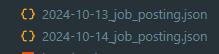
ex) 2024-10-13_job.json

만약 하루 단위의 최신 데이터들을 보여주는 거라면 json 뒤에 숫자를 날짜를 붙이고  

해당 디렉토리에서 json 파일 앞 문자열 들을 추출해서 가장 최근의 날짜 데이터를 읽어 시각화하는 모듈 구성 필요 (백엔드)

혹은 DB 저장이라면? 데이터 도메인을 어떻게 정의할지  필요

만약 하루하루 단위로 수집을 DB에 저장한다 가정하면 -> 중복 값 제거는 UNIQUE값을 걸어서 해야할거 같다.

UNIQUE는 공고 ID

---

__[데이터 인사이트 도출]__
<br>
-> 데이터를 날짜별로 정리하거나 (날짜 별로 테이블(혹은 컬럼)으로 관리할 시) 관리할 시 (특정 날짜) / (특정 지역 혹은 특정 직군 혹은 특정 스킬)을 count하여 날짜별로 꺾은선 그래프로 나타내면 얼마나 많은 직군 및 스킬의 수요를 알 수 있다.
<br><br>

-> 특정 직군을 group by 한다는 가정하에 counter library를 이용하여 해당 직군이 가장 필요로 하는 skill을 wordcloud로 시각화 가능하다.

---

In [196]:
import json
from collections import Counter

# Define the file path
file_path = './data/2024-10-15_jobplanet_1.json'

# Read the JSON file
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Extract skills from each job entry
all_skills = []
for job in data:
    all_skills.extend(job.get('skills', []))

# Count the occurrences of each skill
skill_counter = Counter(all_skills)

# Print the results
for skill, count in skill_counter.items():
    pass
    # print(f"{skill}: {count}")

sorted_skills = skill_counter.most_common()

for skill, count in sorted_skills:
    print(f"{skill}: {count}")

Languages-Python: 180
Languages-Java: 134
Languages-C++: 129
Web Frameworks-React: 95
Cloud-AWS: 94
Other-Linux: 91
Languages-Javascript: 74
Web Frameworks-Spring: 69
Languages-TypeScript: 64
Version Control-Git: 60
Languages-C: 56
AI-Machine Learning: 52
Languages-SQL: 52
Database-MySQL: 51
Languages-C#: 39
AI-Deep Learning: 38
데이터분석: 35
Web Frameworks-Next.js: 32
Other-REST API: 31
Frontend-HTML: 31
DevOps-Docker: 30
Data Science-PyTorch: 29
Web Frameworks-Node.js: 29
Data Science-TensorFlow: 28
DevOps-Kubernetes: 28
Web Frameworks-Vue.js: 24
Frontend-CSS: 24
Languages-Kotlin: 22
Database-Oracle: 21
Languages-Go: 20
기술지원: 20
알고리즘 개발: 19
Database-PostgreSQL: 19
네트워크: 19
개발: 19
QA: 18
Web Frameworks-Django: 18
Cloud-GCP: 17
Other-Redis: 17
Mobile Development-iOS: 16
비즈니스 영어: 15
보안: 15
유지보수: 15
Cloud: 14
웹개발: 14
정보보안: 13
SAP: 13
nosql: 12
Languages-R: 12
하드웨어: 12
회로설계: 12
임베디드 시스템: 12
Tools-Jira: 12
devops: 12
rdbms: 12
AI-NLP: 11
jsp: 11
API: 11
Languages-Swift: 11
Rust: 10
Cloud-Azure